In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size
plt.style.use("ggplot")
%matplotlib inline

### --- compare precision ---

In [2]:
resnet18_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet18_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet18_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet18_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet34_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet34_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet34_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet34_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet101_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet101_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet101_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet101_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')

In [3]:
def get_precisions(df):
    precisions = []
    for i in range(len(df)):
        val_count_per_label = df[i:i+1]
        index = val_count_per_label.columns[1:]
        val_count_per_label = [int(val_count_per_label[idx]) for idx in index]
        precision = val_count_per_label[i]/sum(val_count_per_label)
        precisions.append(precision)
    return np.asarray(precisions)

In [4]:
resnet18_not_pretrained_precisions = get_precisions(resnet18_not_pretrained)
resnet18_pretrained_precisions = get_precisions(resnet18_pretrained)
resnet34_not_pretrained_precisions = get_precisions(resnet34_not_pretrained)
resnet34_pretrained_precisions = get_precisions(resnet34_pretrained)
resnet50_not_pretrained_precisions = get_precisions(resnet50_not_pretrained)
resnet50_pretrained_precisions = get_precisions(resnet50_pretrained)
resnet101_not_pretrained_precisions = get_precisions(resnet101_not_pretrained)
resnet101_pretrained_precisions = get_precisions(resnet101_pretrained)

In [5]:
exp_name = ["resnet18_not_pretrained", "resnet34_not_pretrained", "resnet50_not_pretrained", "resnet101_not_pretrained",
           "resnet18_pretrained", "resnet34_pretrained", "resnet50_pretrained", "resnet101_pretrained"]
exp_ap = [resnet18_not_pretrained_precisions.mean(), resnet34_not_pretrained_precisions.mean(), resnet50_not_pretrained_precisions.mean(), resnet101_not_pretrained_precisions.mean(),
         resnet18_pretrained_precisions.mean(), resnet34_pretrained_precisions.mean(), resnet50_pretrained_precisions.mean(), resnet101_pretrained_precisions.mean()]

In [6]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet18_not_pretrained,0.522186
1,resnet34_not_pretrained,0.496959
2,resnet50_not_pretrained,0.506048
3,resnet101_not_pretrained,0.527206
4,resnet18_pretrained,0.840387
5,resnet34_pretrained,0.856117
6,resnet50_pretrained,0.877763
7,resnet101_pretrained,0.874505


In [7]:
df_per_label = pd.DataFrame({"resnet18_not_pretrained": resnet18_not_pretrained_precisions, "resnet18_pretrained": resnet18_pretrained_precisions,
               "resnet34_not_pretrained": resnet34_not_pretrained_precisions, "resnet34_pretrained": resnet34_pretrained_precisions,
               "resnet50_not_pretrained": resnet50_not_pretrained_precisions, "resnet50_pretrained": resnet50_pretrained_precisions,
               "resnet101_not_pretrained": resnet101_not_pretrained_precisions, "resnet101_pretrained": resnet101_pretrained_precisions})
df_per_label['Name'] = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [8]:
df_per_label

,resnet18_not_pretrained,resnet18_pretrained,resnet34_not_pretrained,resnet34_pretrained,resnet50_not_pretrained,resnet50_pretrained,resnet101_not_pretrained,resnet101_pretrained,Name
0,0.794749,0.935561,0.761337,0.930788,0.744630,0.933174,0.754177,0.926014,Diptera
1,0.411765,0.921569,0.431373,0.882353,0.529412,0.960784,0.666667,0.921569,Ephemeridae
2,0.440000,0.640000,0.425000,0.760000,0.405000,0.770000,0.355000,0.745000,Ephemeroptera
3,0.655556,0.900000,0.677778,0.866667,0.588889,0.885185,0.581481,0.903704,Lepidoptera
4,0.291045,0.761194,0.246269,0.820896,0.328358,0.813433,0.417910,0.850746,Plecoptera
5,0.540000,0.884000,0.440000,0.876000,0.440000,0.904000,0.388000,0.900000,Trichoptera


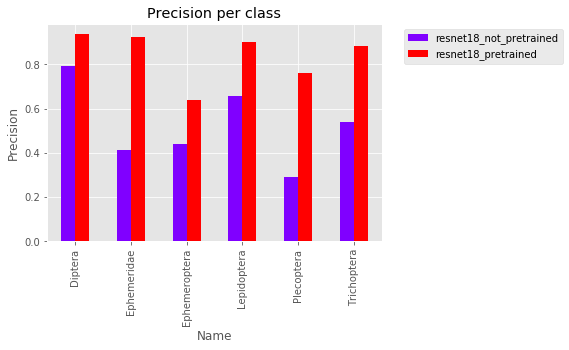

In [9]:
df_per_label.plot(kind="bar", x="Name", y=["resnet18_not_pretrained", "resnet18_pretrained"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_models/compare_precision_resnet18.png", bbox_inches="tight")

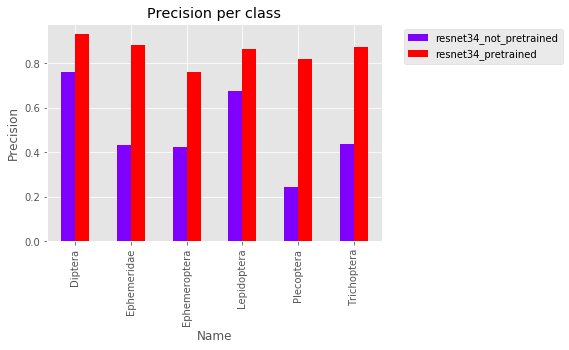

In [10]:
df_per_label.plot(kind="bar", x="Name", y=["resnet34_not_pretrained", "resnet34_pretrained"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_models/compare_precision_resnet34.png", bbox_inches="tight")

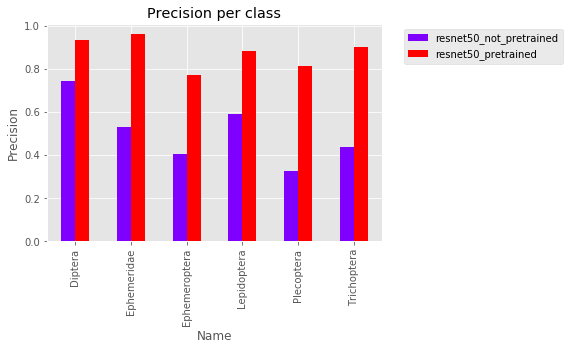

In [11]:
df_per_label.plot(kind="bar", x="Name", y=["resnet50_not_pretrained", "resnet50_pretrained"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_models/compare_precision_resnet50.png", bbox_inches="tight")

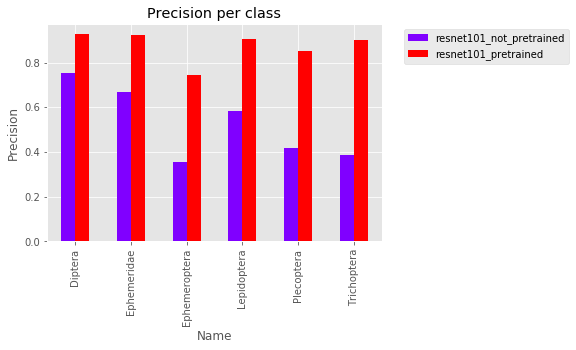

In [12]:
df_per_label.plot(kind="bar", x="Name", y=["resnet101_not_pretrained", "resnet101_pretrained"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_models/compare_precision_resnet101.png", bbox_inches="tight")

### --- compare confusion matrix ---

In [13]:
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/validation_matrix.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')

In [14]:
resnet50_not_pretrained, resnet50_pretrained

(   Unnamed: 0      0     1     2      3     4      5
 0           0  312.0   9.0  23.0   17.0  28.0   30.0
 1           1    7.0  27.0   1.0    9.0   5.0    2.0
 2           2   33.0   4.0  81.0    8.0  31.0   43.0
 3           3   31.0  14.0  16.0  159.0  25.0   25.0
 4           4   20.0   6.0  18.0   14.0  44.0   32.0
 5           5   34.0   3.0  36.0   22.0  45.0  110.0,
    Unnamed: 0      0     1      2      3      4      5
 0           0  391.0   0.0   17.0    8.0    1.0    2.0
 1           1    0.0  49.0    0.0    2.0    0.0    0.0
 2           2   13.0   9.0  154.0    4.0   13.0    7.0
 3           3    8.0   3.0    6.0  239.0    1.0   13.0
 4           4    1.0   2.0   12.0    1.0  109.0    9.0
 5           5    1.0   0.0    7.0    7.0    9.0  226.0)

### --- compare accuracy distribution of size ---

In [15]:
resnet50_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_not_pretrain/all_size_df.csv')
resnet50_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')

In [16]:
resnet50_not_pretrained = resnet50_not_pretrained.drop(resnet50_not_pretrained.index[[0]])
resnet50_pretrained = resnet50_pretrained.drop(resnet50_pretrained.index[[0]])

In [17]:
all_df = resnet50_not_pretrained
all_df = all_df.rename(columns={'Accuracy': 'resnet50_not_pretrained'})
all_df = all_df.assign(resnet50_pretrained=resnet50_pretrained["Accuracy"])
all_df

,order,resnet50_not_pretrained,Insect_size,order.1,resnet50_pretrained
1,7.0,1.000000,205.833333,7.0,1.000000
2,8.0,0.862745,395.039216,8.0,0.901961
3,9.0,0.503937,770.850394,9.0,0.716535
4,10.0,0.343220,1504.529661,10.0,0.805085
5,11.0,0.396552,2941.368966,11.0,0.875862
6,12.0,0.654839,5934.145161,12.0,0.938710
7,13.0,0.732057,11264.789474,13.0,0.956938
8,14.0,0.705128,22344.653846,14.0,0.961538
9,15.0,0.600000,34865.400000,15.0,0.900000


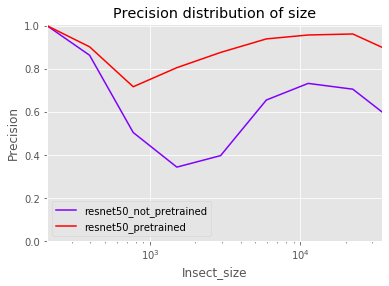

In [18]:
all_df.plot(x="Insect_size", y=["resnet50_not_pretrained", "resnet50_pretrained"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.title("Precision distribution of size")
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_models/compare_precision_distrib_of_size.png", bbox_inches="tight")